In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp

# h/a vs. a

In [3]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')
print text_file1 # Prints the text file as a 2d array.
print text_file1.shape

[[ 0.4076886  -0.63140897]
 [ 0.54223664 -0.66783315]
 [ 0.64981802 -0.7223981 ]
 [ 0.74841391 -0.78149655]
 [ 0.87389496 -0.85877652]
 [ 1.02620004 -0.98147974]
 [ 1.16955019 -1.09509559]
 [ 1.2949803  -1.195077  ]
 [ 1.38454995 -1.27687009]
 [ 1.48312546 -1.34504911]
 [ 1.55480563 -1.39958689]
 [ 1.65344227 -1.44052419]
 [ 1.73422    -1.44058531]
 [ 1.82400359 -1.42703237]
 [ 1.90483225 -1.40439206]
 [ 1.97661429 -1.41352697]
 [ 2.0573207  -1.4453701 ]
 [ 2.14691073 -1.51808262]
 [ 2.20959522 -1.58169419]
 [ 2.29013863 -1.68618192]
 [ 2.39754682 -1.81793176]
 [ 2.48705534 -1.92696657]
 [ 2.56768025 -1.99513201]
 [ 2.63041568 -2.03604214]
 [ 2.72904213 -2.08151972]
 [ 2.80976383 -2.10655243]
 [ 2.89948119 -2.12251135]
 [ 2.9623185  -2.11801861]
 [ 3.0611538  -2.0704203 ]
 [ 3.18694557 -2.0092215 ]
 [ 3.51940871 -1.84148216]
 [ 4.02259616 -1.58760641]
 [ 4.5527299  -1.32467045]
 [ 5.00200442 -1.09799567]
 [ 5.3883754  -0.9053255 ]
 [ 6.0622617  -0.57666404]
 [ 6.60139112 -0.3046543 ]
 

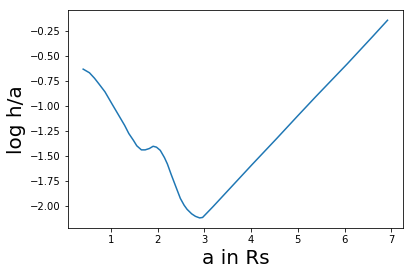

In [33]:
a = text_file1[:,0]
ratio = text_file1[:,1]
plt.plot(a,ratio) # Sets each column as the x and y coordinates, and creates and shows a plot.
plt.xlabel('a in Rs',fontsize=20)
plt.ylabel('log h/a',fontsize=20)

# h vs. a

In [5]:
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = ratio1*a1
print height

[  5.97419825e-01   7.48864931e-01   8.46096548e-01   9.26653493e-01
   1.03542452e+00   1.10846071e+00   1.18701061e+00   1.25864514e+00
   1.28138566e+00   1.37428357e+00   1.42961383e+00   1.63274396e+00
   1.96623165e+00   2.49442940e+00   3.16548449e+00   3.65668312e+00
   4.09214110e+00   4.25429997e+00   4.24522814e+00   4.01750759e+00
   3.79852562e+00   3.63152274e+00   3.73721635e+00   3.92982799e+00
   4.44142580e+00   5.04907005e+00   5.98370042e+00   6.98714721e+00
   9.78889119e+00   1.50565013e+01   4.76350412e+01   2.72263709e+02
   1.69067236e+03   8.01694211e+03   3.04123448e+04   3.05912809e+05
   1.98032658e+06   6.01085228e+06]


# h vs a adjusted

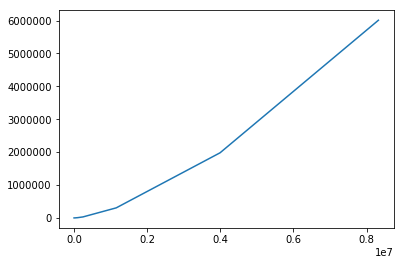

In [6]:
plt.plot(a1,height)

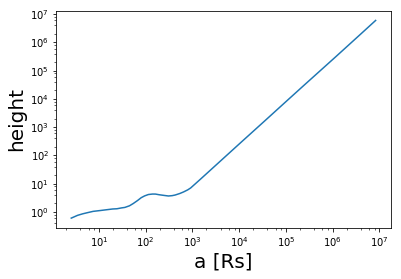

In [7]:
logPlot = plt.gca()
logPlot.loglog(a1,height)
plt.xlabel('a [Rs]',fontsize=20)
plt.ylabel('height',fontsize=20)

# Surf.density vs a

In [28]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]

In [ ]:
unlog_sd = 10**text_file2[:,1]
unlog_a2 = 10**a2
print unlog_a2, unlog_sd

In [30]:
print unlog_a2

[  2.59665597e+00   3.77204249e+00   6.60419396e+00   1.51418933e+01
   3.00246171e+01   3.77204249e+01   4.54629547e+01   5.71158648e+01
   6.60419396e+01   7.63629826e+01   9.39664831e+01   1.18051653e+02
   1.45265393e+02   1.75082703e+02   2.11020343e+02   2.65108360e+02
   3.40041193e+02   4.54629547e+02   5.59432571e+02   7.25037318e+02
   9.20373200e+02   1.48310251e+03   3.61874981e+03   1.13254132e+04
   3.85110700e+04   1.23052400e+05   3.19524751e+05   1.15628013e+06
   3.19524751e+06   8.64842328e+06]


In [32]:
print unlog_sd

[  5.09440915e+03   6.98865485e+03   1.27427499e+04   3.61703243e+04
   8.49301292e+04   1.05967240e+05   1.16509558e+05   1.05967240e+05
   8.76580413e+04   7.97263406e+04   7.25123365e+04   8.22871096e+04
   1.05967240e+05   1.50038037e+05   2.26303398e+05   3.41334965e+05
   4.98816147e+05   6.42362708e+05   7.06269175e+05   6.84290128e+05
   6.52597355e+05   3.20420891e+05   8.76580413e+04   1.54043373e+04
   2.46209240e+03   4.25883307e+02   1.05967240e+02   1.56497718e+01
   3.22113668e+00   7.40568469e-01]


In [47]:
x = np.arange(45.4)
ya = 2.91e+03*x - 5.09e+03

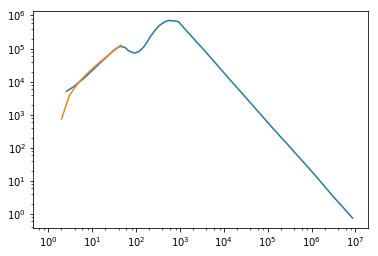

In [48]:
logPlot=plt.gca()
logPlot.loglog(unlog_a2,unlog_sd)
logPlot.loglog(ya)

# This is velocity vs. distance

In [11]:
c = 6.67e-11*2*1.99e30*10**8
d = text_file1[:,0]
distance2= 10**d

distance_in_meters = distance2*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)
print distance

distance_in_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)


[  1.50829051e+12   2.05604699e+12   2.63399178e+12   3.30529560e+12
   4.41256741e+12   6.26608716e+12   8.71658928e+12   1.16352761e+13
   1.43003393e+13   1.79441072e+13   2.11642082e+13   2.65606479e+13
   3.19901583e+13   3.93368861e+13   4.73836640e+13   5.58998556e+13
   6.73158132e+13   8.27384004e+13   9.55854111e+13   1.15062822e+14
   1.47347649e+14   1.81072182e+14   2.18010115e+14   2.51890665e+14
   3.16110212e+14   3.80680137e+14   4.68034198e+14   5.40897399e+14
   6.79125742e+14   9.07281305e+14   1.95076566e+15   6.21430489e+15
   2.10632943e+16   5.92653439e+16   1.44268593e+17   6.80860434e+17
   2.35606633e+18   4.91108569e+18]


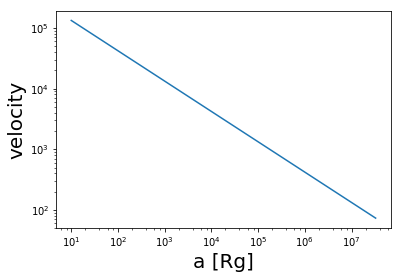

In [12]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,velocity)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('velocity',fontsize=20)

# T Orbit vs. Distance

In [13]:
pi = 3.14
T_Orb = (2*np.pi*distance_in_rg*1.5*10**8)/velocity
print T_Orb
print distance_in_rg

[  7.14336614e+04   1.13690707e+05   1.64853070e+05   2.31734595e+05
   3.57447648e+05   6.04881166e+05   9.92419501e+05   1.53052509e+06
   2.08542669e+06   2.93128603e+06   3.75472775e+06   5.27877819e+06
   6.97750247e+06   9.51426805e+06   1.25781965e+07   1.61172686e+07
   2.12986001e+07   2.90225853e+07   3.60381786e+07   4.75968209e+07
   6.89747653e+07   9.39621653e+07   1.24133894e+08   1.54167747e+08
   2.16737073e+08   2.86428179e+08   3.90473708e+08   4.85118409e+08
   6.82496933e+08   1.05387320e+09   3.32263831e+09   1.88914047e+10
   1.17886713e+11   5.56386557e+11   2.11316354e+12   2.16651929e+13
   1.39462256e+14   4.19702622e+14]
[  1.00552700e+01   1.37069799e+01   1.75599452e+01   2.20353040e+01
   2.94171160e+01   4.17739144e+01   5.81105952e+01   7.75685071e+01
   9.53355951e+01   1.19627381e+02   1.41094721e+02   1.77070986e+02
   2.13267722e+02   2.62245907e+02   3.15891093e+02   3.72665704e+02
   4.48772088e+02   5.51589336e+02   6.37236074e+02   7.67085479e+0

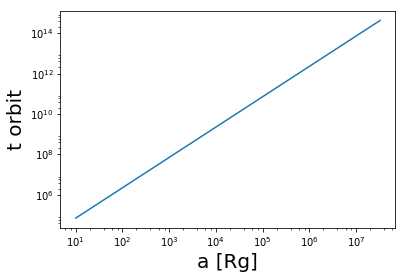

In [14]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,T_Orb)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t orbit',fontsize=20)

# Time in disk vs Distance

In [15]:
t_in_disk = (ratio1*T_Orb)/2*np.pi
print t_in_disk

[  2.62188605e+04   3.83717579e+04   4.90703116e+04   6.02024554e+04
   7.77241184e+04   9.91539918e+04   1.25233229e+05   1.53420479e+05
   1.73158859e+05   2.08031436e+05   2.35023580e+05   3.00697005e+05
   3.97406131e+05   5.59065755e+05   7.78657005e+05   9.76977035e+05
   1.19977783e+06   1.38284452e+06   1.48316178e+06   1.53998291e+06
   1.64770079e+06   1.74624960e+06   1.97186985e+06   2.22880084e+06
   2.82184632e+06   3.52032848e+06   4.62594346e+06   5.80696254e+06
   9.11591531e+06   1.62064067e+07   7.51831956e+07   7.66968841e+08
   8.76827746e+09   6.97430340e+10   4.12788403e+11   9.02024627e+12
   1.08623116e+14   4.76010459e+14]


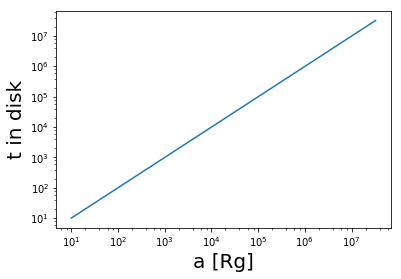

In [16]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,distance_in_rg)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk',fontsize=20)

In [17]:
t_over_T = t_in_disk/T_Orb
print t_over_T

[ 0.36703789  0.33751006  0.29766089  0.25979054  0.21744196  0.16392309
  0.12618981  0.10024042  0.08303282  0.07096934  0.06259404  0.05696337
  0.05695536  0.05876077  0.0619053   0.06061679  0.0563313   0.04764719
  0.04115529  0.03235474  0.02388846  0.0185846   0.01588502  0.01445699
  0.01301968  0.01229044  0.011847    0.0119702   0.01335671  0.01537795
  0.02262756  0.04059883  0.07437884  0.12534996  0.19534144  0.41634738
  0.77887107  1.13416127]


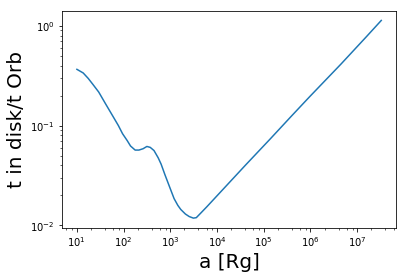

In [18]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_over_T)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk/t Orb',fontsize=20)